# Importing Libraries

In [587]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import yfinance as yf

# Function to Generate data by specifying time intervals and Stock: 

In [588]:
def generate_data(start, end, interval, ticker):
    return yf.download(ticker,start=start,end=end,interval=interval)['Adj Close']

In [589]:
start =  input("Enter start date(YYYY-MM-DD): ")
end = input("Enter end date(YYYY-MM-DD): ")
interval = input("Enter interval(daily, weekly, monthly)(1wk,1mo,1yr): ")
ticker = (input("Enter ticker comma separated:")).split(",")

Enter start date(YYYY-MM-DD): 2019-11-20
Enter end date(YYYY-MM-DD): 2021-11-20
Enter interval(daily, weekly, monthly)(1wk,1mo,1yr): 1mo
Enter ticker comma separated:TSLA,FB


In [590]:
data = generate_data(start,end,interval, ticker)

[*********************100%***********************]  2 of 2 completed


Check number of null values in the data

In [591]:
data.isna().sum()

FB      1
TSLA    1
dtype: int64

Drop the null values in the data if any

In [592]:
data.dropna(inplace=True)

# Plot a graph for cumulative returns for the listed stocks

In [593]:
def plot_cumulative_returns(data):
    ((data.pct_change()+1).cumprod()).plot(figsize=(10, 7))

    # Show the legend
    plt.legend()

    # Define the label for the title of the figure
    plt.title("Returns", fontsize=16)

    # Define the labels for x-axis and y-axis
    plt.ylabel('Cumulative Returns(%)', fontsize=14)
    plt.xlabel('Year', fontsize=14)

    # Plot the grid lines
    plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
    plt.show()

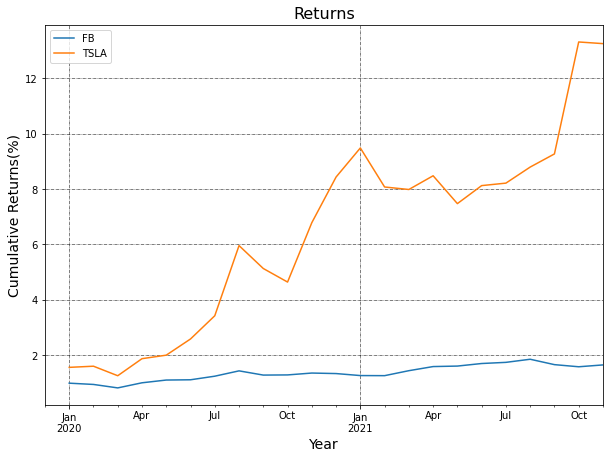

In [594]:
plot_cumulative_returns(data)

# Lump sum return for the stock listed

In [595]:
def lumpsump(df,ticker,investment):
    stock_selected = df[ticker]
    number_of_stocks = investment/stock_selected.values[0]
    total_value = number_of_stocks * stock_selected.values[-1]
    total_return = total_value - investment
    print("Total return for the stocks listed:",total_return)
    return total_return

# Dollar Cost Average for the stock listed

In [596]:
def dca(df,ticker,investment):
    recurring_investment = investment/df.shape[0]
    print("Total number of time periods for investments",df.shape[0])
    print("Recurring Investment for the stocks listed",recurring_investment)
    stock_selected = df[ticker]
    data = pd.DataFrame({'date':stock_selected.index, 'close_value':stock_selected.values})
    data['recurring_investment'] = recurring_investment
    data['number_of_stocks_held'] = data['recurring_investment']/data['close_value']
    total_dca_stocks = data['number_of_stocks_held'].sum()
    print("Total no. of total DCA stocks",total_dca_stocks)
    dca_last_amount = total_dca_stocks * data['close_value'].values[-1]
    print(dca_last_amount)
    print("Total amount after DCA" ,dca_last_amount)
    return (dca_last_amount - investment)

# Fraction investment for the stock listed

In [597]:
def fraction(df,ticker,investment,fraction=0.5):
    print(fraction)
    lumpsump_returns = lumpsump(df,ticker,investment*(1-fraction))
    dca_returns = dca(df,ticker,investment*fraction)
    print(lumpsump_returns)
    print(dca_returns)
    total_returns = lumpsump_returns+dca_returns
    return total_returns

# Enter the fraction value for Dollar Cost: [Lumpsum Cost + fraction * Dollar Cost]

In [598]:
fraction_1= input("Enter value of fraction for Dollar Cost Average between 0 and 1 : ")

Enter value of fraction for Dollar Cost Average between 0 and 1 : 0.3


In [599]:
dca_money = dca(data,ticker[0],1)

Total number of time periods for investments 24
Recurring Investment for the stocks listed 0.041666666666666664
Total no. of total DCA stocks 0.0034119928216485287
3.784002498953595
Total amount after DCA 3.784002498953595


In [600]:
lumpsump_money = lumpsump(data,ticker[0],1)

Total return for the stocks listed: 12.255444558632972


In [601]:
total_fraction_returns = fraction(data,ticker[0],1,float(fraction_1))

0.3
Total return for the stocks listed: 8.57881119104308
Total number of time periods for investments 24
Recurring Investment for the stocks listed 0.012499999999999999
Total no. of total DCA stocks 0.0010235978464945585
1.1352007496860783
Total amount after DCA 1.1352007496860783
8.57881119104308
0.8352007496860783


In [602]:
print("Lump sum returns overall: ",(lumpsump_money+1))
print("DCA returns overall: ",(dca_money+1))
print("Fractional returns overall: ",(total_fraction_returns+1))

Lump sum returns overall:  13.255444558632972
DCA returns overall:  3.784002498953595
Fractional returns overall:  10.414011940729159
